# Modeling with SVM

In [1]:
# import libraries
from dotenv import load_dotenv, find_dotenv
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# modelling libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# define project root directory
PROJ_ROOT = os.path.join(os.pardir)

# define source directory
src_dir = os.path.join(PROJ_ROOT, "src")
sys.path.append(src_dir)

# import my tokenizer
from features.build_features import clean_and_tokenize

# import my visual tools
from visualization.visualize import plot_confusion_matrix, draw_roc_curve

In [2]:
# load the data
df = pd.read_csv(os.path.join(PROJ_ROOT, 'data', 'processed','clinic_train_data.csv'), index_col=0)

# define text feature
text = df.text.values

# define target
target = df.readmission.values
    
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    text, target, stratify=target, test_size=0.33, random_state=42)

In [3]:
def svm_text_classification(train_features, test_features, labels, random_state=42, vec_params=None, svm_params=None):
    '''
    A function to classify text data using count vectorization, random under-sampling,
    and a random forest. Returns an array of predicted labels.
    
    train_features = an array of training features
    test_features = an array of testing features
    labels = an array of training labels
    vec_params = parameters for the CountVectorizer
    rf_params = parameters for the RandomForestClassifier
    '''
    
    pipe_svm = make_pipeline_imb(CountVectorizer(**vec_params),
                                RandomUnderSampler(random_state=random_state),
                                SVC(**svm_params))
    
    pipe_svm_fit = pipe_svm.fit(train_features, labels)
    y_pred_svm = pipe_svm_fit.predict(test_features)
    
    return pipe_svm_fit, y_pred_svm

vec_params = {'max_features': 3000, 'tokenizer': clean_and_tokenize, 'stop_words': 'english'}
svm_params = {'C':1.0, 'gamma':'scale', 'probability':True, 'random_state':42}

model, preds = svm_text_classification(X_train, X_test, y_train, vec_params=vec_params, svm_params=svm_params)

# print metrics summary
print(classification_report_imbalanced(y_test, preds))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.67      0.64      0.79      0.65      0.43     11097
          1       0.11      0.64      0.67      0.19      0.65      0.43       711

avg / total       0.91      0.67      0.64      0.75      0.65      0.43     11808



Confusion matrix, without normalization
[[7400 3697]
 [ 256  455]]


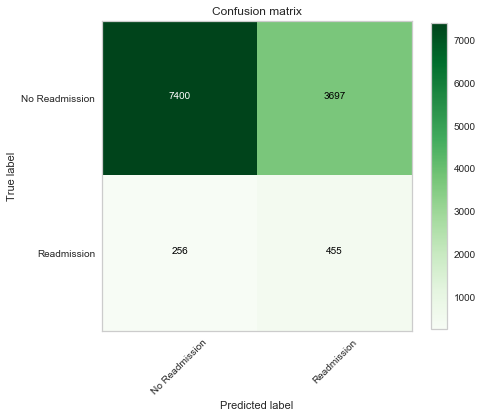

In [4]:
from sklearn.metrics import confusion_matrix
cnf_matrix_svm = confusion_matrix(y_test, preds)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_svm, 
                      classes=['No Readmission','Readmission'],
                      cmap=plt.cm.Greens)

plt.show()

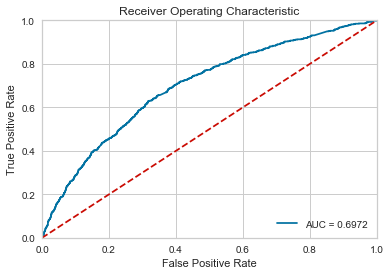

In [5]:
# draw ROC curve
draw_roc_curve(model=model, features=X_test, target=y_test)

In [6]:
svm_params2 = {'C':10.0, 'gamma':'scale', 'probability':True, 'random_state':42}

model2, preds2 = svm_text_classification(X_train, X_test, y_train, vec_params=vec_params, svm_params=svm_params2)

# print metrics summary
print(classification_report_imbalanced(y_test, preds2))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.66      0.63      0.78      0.64      0.41     11097
          1       0.11      0.63      0.66      0.18      0.64      0.41       711

avg / total       0.91      0.66      0.63      0.75      0.64      0.41     11808



Confusion matrix, without normalization
[[7320 3777]
 [ 266  445]]


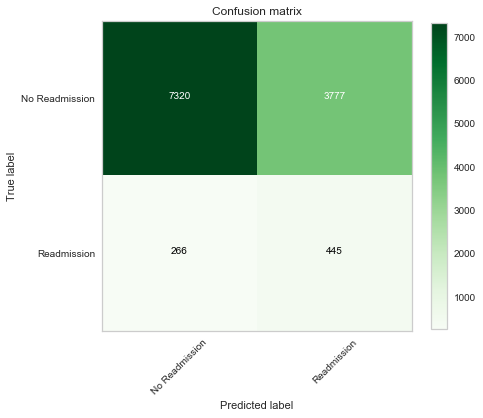

In [7]:
cnf_matrix_svm2 = confusion_matrix(y_test, preds2)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_svm2, 
                      classes=['No Readmission','Readmission'],
                      cmap=plt.cm.Greens)

plt.show()

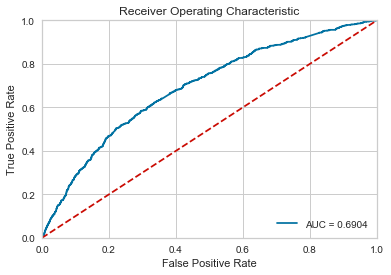

In [8]:
# draw ROC curve
draw_roc_curve(model=model2, features=X_test, target=y_test)

In [9]:
svm_params3 = {'C':0.1, 'gamma':'scale', 'probability':True, 'random_state':42}

model3, preds3 = svm_text_classification(X_train, X_test, y_train, vec_params=vec_params, svm_params=svm_params3)

# print metrics summary
print(classification_report_imbalanced(y_test, preds3))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.65      0.59      0.77      0.62      0.38     11097
          1       0.10      0.59      0.65      0.17      0.62      0.38       711

avg / total       0.91      0.64      0.59      0.74      0.62      0.38     11808



Confusion matrix, without normalization
[[7187 3910]
 [ 291  420]]


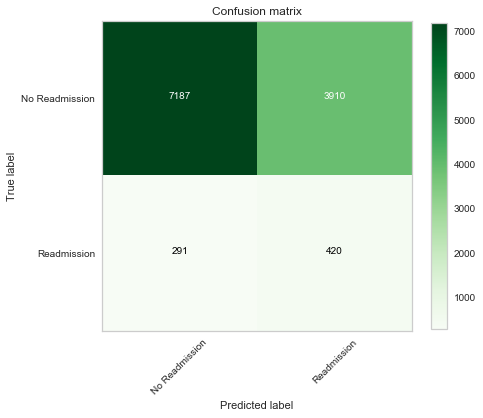

In [10]:
cnf_matrix_svm3 = confusion_matrix(y_test, preds3)
    
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_svm3, 
                      classes=['No Readmission','Readmission'],
                      cmap=plt.cm.Greens)

plt.show()

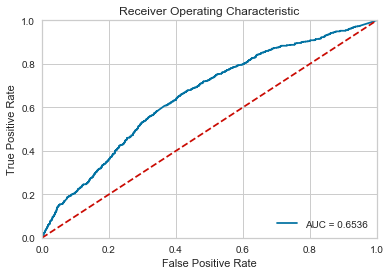

In [11]:
# draw ROC curve
draw_roc_curve(model=model3, features=X_test, target=y_test)